<a href="https://colab.research.google.com/github/abhayratti/exoplanet-detection/blob/main/Exoplanet_Detection_Regression_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd

In [193]:
data = pd.read_csv('/content/cumulative.csv')
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [194]:
archive_info = ['kepler_name', 'kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition', 'rowid']
data = data.drop(archive_info, axis=1)

In [195]:
project_disposition = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
data = data.drop(project_disposition, axis=1)

In [196]:
threshold_crossing_events = ['koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname']
data = data.drop(threshold_crossing_events, axis=1)

In [197]:
kic_parameters = ['ra', 'dec', 'koi_kepmag']
data = data.drop(kic_parameters, axis=1)

In [198]:
transit_properties = ['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 
                      'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 
                      'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2']
data = data.drop(transit_properties, axis=1)

In [199]:
pd.set_option('display.max_columns', 50)

data.dropna(inplace=True)
data.head()

,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
0,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [200]:
data.shape

(7995, 12)

In [201]:
data.columns

Index(['koi_score', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
       'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff',
       'koi_slogg', 'koi_srad'],
      dtype='object')

In [202]:
features = ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad']
data_features = data[features]

data_features.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [203]:
data_target = data['koi_score']

In [204]:
from sklearn.model_selection import train_test_split
import torch
import numpy as np

In [205]:
class ExoplanetDataset(torch.utils.data.Dataset):

    def __init__(self, train=True):
        x_train, x_test, y_train, y_test = train_test_split(torch.from_numpy(data_features.values).float(), 
                                                            torch.from_numpy(data_target.values).float(), 
                                                            test_size=0.2, 
                                                            random_state=0)
        
        if train:
            self.x_data, self.y_data = x_train, y_train
        else:
            self.x_data, self.y_data = x_test, y_test

    def __len__(self):
        return self.y_data.shape[0]
    
    def __getitem__(self, i):
        return self.x_data[i], self.y_data[i]

In [206]:
train_loader = torch.utils.data.DataLoader(ExoplanetDataset(train=True), batch_size=12)
test_loader = torch.utils.data.DataLoader(ExoplanetDataset(train=False), batch_size=12)

In [207]:
import torch.nn as nn
import torch.nn.functional as F

In [208]:
input_size = 11
output_size = 1
hid1_size = 20
hid2_size = 10

In [209]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hid1_size)
    self.fc2 = nn.Linear(hid1_size, hid2_size)
    self.fc3 = nn.Linear(hid2_size, output_size)
  
  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    x = self.fc3(x)

    return torch.sigmoid(x)

In [210]:
model = Net()

In [211]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.L1Loss(reduction='mean')

In [212]:
epoch_data = []
epochs = 1000

In [213]:
for epoch in range(1, epochs + 1):
    valid_loss = 0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        output_train = model(x)
        loss = loss_fn(output_train.squeeze(1), y)
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        for x, y in test_loader:
            output_test = model(x)
            loss = loss_fn(output_test.squeeze(1), y)
            valid_loss += loss.item()
            valid_loss /= len(test_loader)

    if epoch % 50 == 0:
        print(f"Training loss: {loss.item()} \| Valid loss: {valid_loss}")
    

Training loss: 0.18536460399627686 \| Valid loss: 0.0013932632046603456
Training loss: 0.18572622537612915 \| Valid loss: 0.0013955034810789724
Training loss: 0.18398062884807587 \| Valid loss: 0.001382434890642793
Training loss: 0.18399667739868164 \| Valid loss: 0.0013825464134067764
Training loss: 0.15452693402767181 \| Valid loss: 0.0011626118098879898
Training loss: 0.15506777167320251 \| Valid loss: 0.0011666207815756444
Training loss: 0.1599942445755005 \| Valid loss: 0.001203418890345657
Training loss: 0.18511660397052765 \| Valid loss: 0.0013953470825879488
Training loss: 0.1640068143606186 \| Valid loss: 0.001233307821842547
Training loss: 0.16957159340381622 \| Valid loss: 0.0012749881422661274
Training loss: 0.16565172374248505 \| Valid loss: 0.0012498429673869927
Training loss: 0.17660236358642578 \| Valid loss: 0.0013311121600647186
Training loss: 0.16783522069454193 \| Valid loss: 0.0012657111910038652
Training loss: 0.17308413982391357 \| Valid loss: 0.00130087409493436

In [214]:
all_data = ExoplanetDataset(train=False)

In [215]:
y_pred_tensor = model(all_data.x_data)
y_pred = y_pred_tensor.detach().numpy()

y_true_tensor = all_data.y_data
y_true = y_true_tensor.detach().numpy()

In [216]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Text(0.5, 1.0, 'Predicted vs. Actual KOI Score')

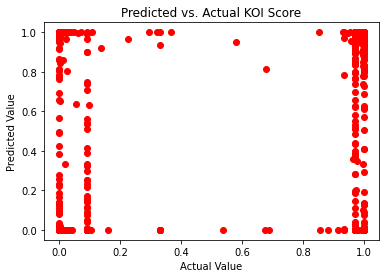

In [217]:
plt.scatter(y_pred, y_true, color="red")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

plt.title("Predicted vs. Actual KOI Score")

In [219]:
score = r2_score(y_true, y_pred)
# print(f"The accuracy of the model is {score}")